## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\google_stock_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [4]:
# Check for duplication
df.duplicated().sum()

0

In [5]:
# Check for null
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Change ['Date'] value to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

## Overview plot

In [7]:
plt.style.use('bmh')

<Axes: title={'center': 'Google Stock Price Overview'}>

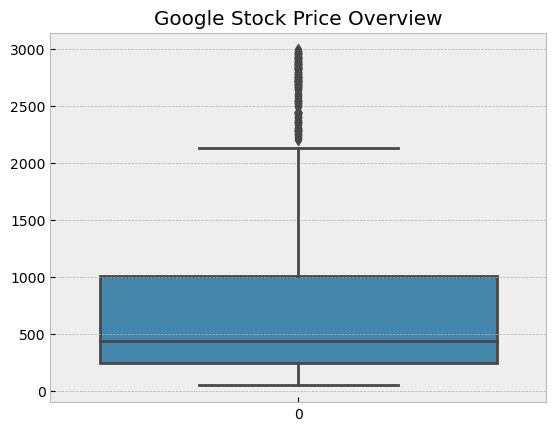

In [8]:
plt.title('Google Stock Price Overview')
sns.boxplot(data=df['Close'])

Most of the stock price ranged from 400 to 1000 with a mean of around 500

In [9]:
# Add measure: add percentage changes of closing stocks
df['close_change'] = df['Close'].pct_change()

<Axes: title={'center': 'Google Stock Price Changes'}, xlabel='Date', ylabel='close_change'>

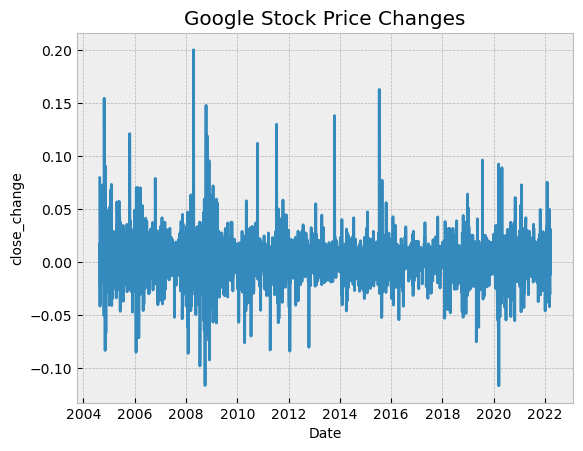

In [10]:
plt.title('Google Stock Price Changes')
sns.lineplot(x='Date',y='close_change', data=df)

## Making time series stationary

In [11]:
# Set upper and lower limit by calculating standard deviation and mean
std = df['close_change'].std()
mn = df['close_change'].mean()

upper_limit = mn + (3 * std)
lower_limit = mn - (3 * std)

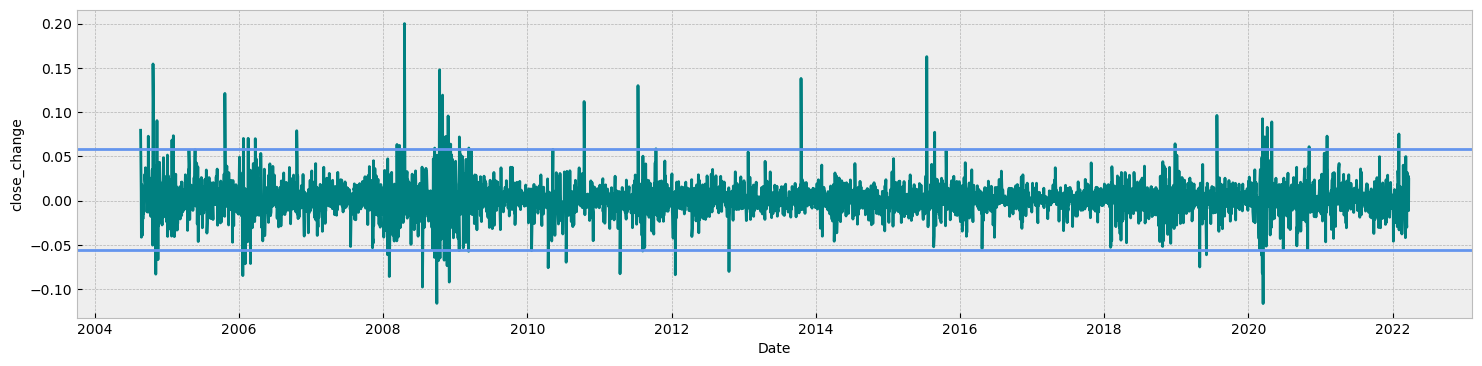

In [12]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
sns.lineplot(x='Date', y='close_change', data=df, ax= ax, color='teal')

plt.axhline(upper_limit , color='cornflowerblue')
plt.axhline(lower_limit , color='cornflowerblue')

The axhline show the boundary of where anomaly occured

<function matplotlib.pyplot.show(close=None, block=None)>

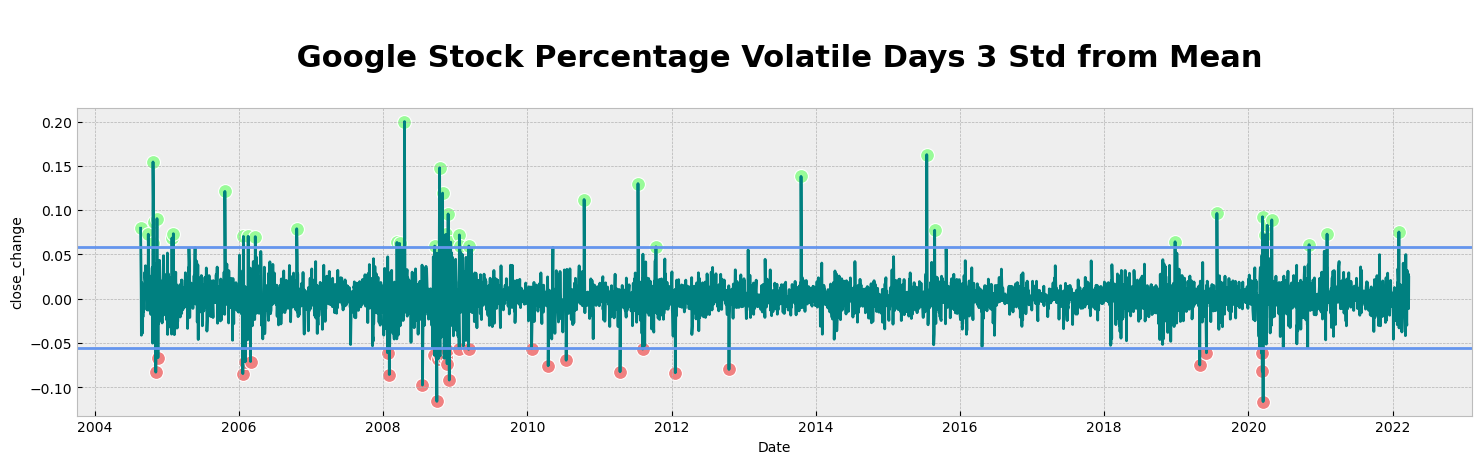

In [13]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
sns.lineplot(x='Date', y='close_change', data=df, ax= ax, color='teal')

plt.axhline(upper_limit , color='cornflowerblue')
plt.axhline(lower_limit , color='cornflowerblue')

sns.scatterplot(x='Date', y='close_change', data=df[(df['close_change'] < lower_limit)],
                color='lightcoral', ax=ax, s=100)
sns.scatterplot(x='Date', y='close_change', data=df[(df['close_change'] > upper_limit)],
                color='palegreen', ax=ax, s=100)

plt.title('\n Google Stock Percentage Volatile Days 3 Std from Mean\n ', fontsize=22, fontweight='bold')
plt.show

Highlight anomallies with different colors